In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df =pd.read_csv('attacks_pandas_5.csv')
df.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,fatal_(y/n),injury,date
0,1800.00.00,1800.0,Unprovoked,SEYCHELLES,St. Anne,NaN,a corsair's boat was overturned,NaN,F,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,"FATAL, all onboard were killed by sharks",1800
1,1797.05.28.R,1797.0,Unprovoked,NaN,NaN,NaN,Dropped overboard,child,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,FATAL,Reported May-28-1797


In [4]:
#Traemos todos los filtros de df creados en el pair anterior
usa = df[df['country']=='USA']
usa.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,fatal_(y/n),injury,date
10,1780.08.08,1780.0,Unprovoked,USA,Florida,"Pensacola Harbor, Escambia County",Swimming,Joseph Feron,M,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,FATAL,08-Aug-1780
11,1779.00.00,1779.0,Unprovoked,USA,Hawaii,"Maliu, Hawai'i",Surfing,Nu'u-anu-pa'a hu,M,young,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,"FATAL, buttock lacerated",1779


In [5]:
ataques_usa = pd.DataFrame(usa.groupby('year')['case_number'].count())
ataques_usa.reset_index(inplace=True)
ataques_usa.head(2)

,year,case_number
0,0.0,17
1,1642.0,1


In [6]:
ataques_usa_2000 = ataques_usa[ataques_usa['year']>=2000.0]
ataques_usa_2000.head(2)

,year,case_number
57,2000.0,22
58,2001.0,22


In [7]:
ataques_usa_tipo = pd.DataFrame(usa.groupby('type')['case_number'].count())
ataques_usa_tipo.reset_index(inplace=True)
ataques_usa_tipo.head()

,type,case_number
0,Boating,11
1,Invalid,48
2,Provoked,49
3,Sea Disaster,1
4,Unprovoked,632


In [8]:
españa = df[df['country']=='SPAIN']
españa.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,fatal_(y/n),injury,date
16,1764.00.00,1764.0,Unprovoked,SPAIN,NaN,Guadalquivir River,Swimming,male,M,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,FATAL,1764
65,ND-0129,0.0,Unprovoked,SPAIN,Canary Islands,Tenerife,Skin diving,NaN,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,N,Injury required 16 stitches,Before 2012


In [9]:
españa.size

112

In [10]:
ataques_españa = pd.DataFrame(españa.groupby('year')['case_number'].count())
ataques_españa.reset_index(inplace=True)
ataques_españa.head()

,year,case_number
0,0.0,1
1,1764.0,1
2,1993.0,1
3,2010.0,1
4,2015.0,1


In [11]:
ataques_españa_2000 = ataques_españa[ataques_españa['year']>=2000.0]
ataques_españa_2000.head(5)

,year,case_number
3,2010.0,1
4,2015.0,1
5,2016.0,1
6,2017.0,1


In [12]:
ataques_españa_tipo = pd.DataFrame(españa.groupby('type')['case_number'].count())
ataques_españa_tipo.reset_index(inplace=True)
ataques_españa_tipo.head()

,type,case_number
0,Invalid,2
1,Provoked,1
2,Unprovoked,4


1- Ayer creamos un par de gráficas para USA y España, donde visualizamos el número de ataques en cada país a lo largo de los años y el tipo de los ataques. Hoy tendréis que hacer dos gráficas con subplots:
- En la primera debéis mostrar los tipos ataques en USA y España, cada subplot corresponderá a un país. Debéis:
    - Poner nombre a los ejes de cada uno de los subplots
    - Poner un títulos a cada uno de los subplots
    - Poner el color de las líneas en negro.
    - Establecer el tamaño de la gráfica a 15 x 5
    - Ponerle marcadores a las gráficas
    - No incluir leyenda

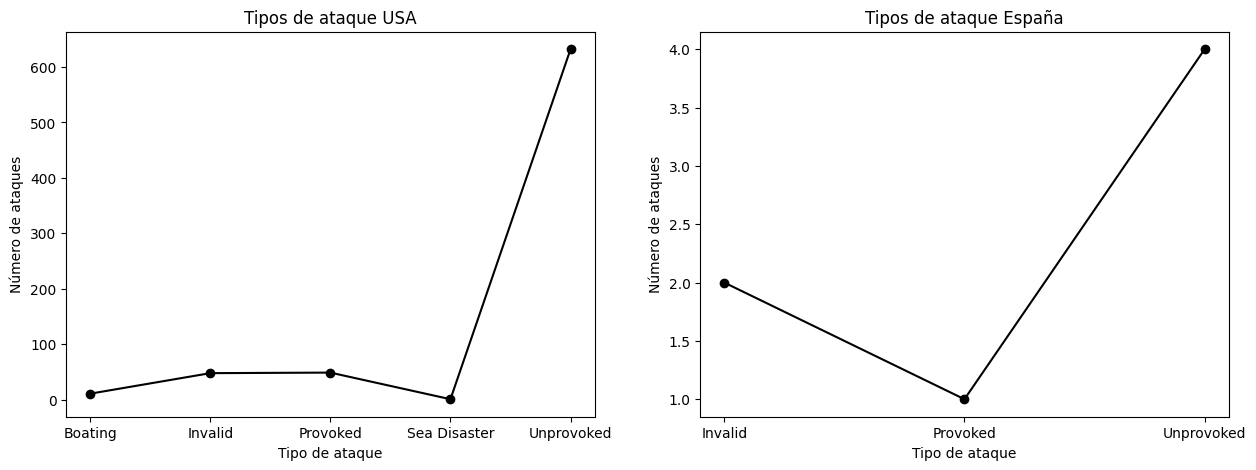

In [21]:
fig,ax=plt.subplots(1,2, figsize =(15,5))#Indicamos la forma del subplot y cambiamos el tamaño de la forma

ax[0].plot(ataques_usa_tipo['type'], ataques_usa_tipo['case_number'], marker = 'o', color='black') #Cambiamos el marcador y ponemos el color en negro
ax[1].plot(ataques_españa_tipo['type'], ataques_españa_tipo['case_number'], marker = 'o', color='black')

#Añadimos los titulos
ax[0].set_title("Tipos de ataque USA") 
ax[1].set_title("Tipos de ataque España")

# Ponemos titulos a los ejes
ax[0].set_xlabel("Tipo de ataque")
ax[0].set_ylabel("Número de ataques")

ax[1].set_xlabel("Tipo de ataque")
ax[1].set_ylabel("Número de ataques")

plt.savefig("tipo_ataque_pais_sep.png") #Guardamos la imagen
plt.show();

- En la segunda debéis mostrar los ataques por año para cada uno de los países.
    - De nuevo tendréis que ponerle nombre a los ejes y título a cada gráfica.
    - En este caso el subplot deberá tener dos filas y una columna
    - No incluir leyenda
    - Cambiar el color de las barras

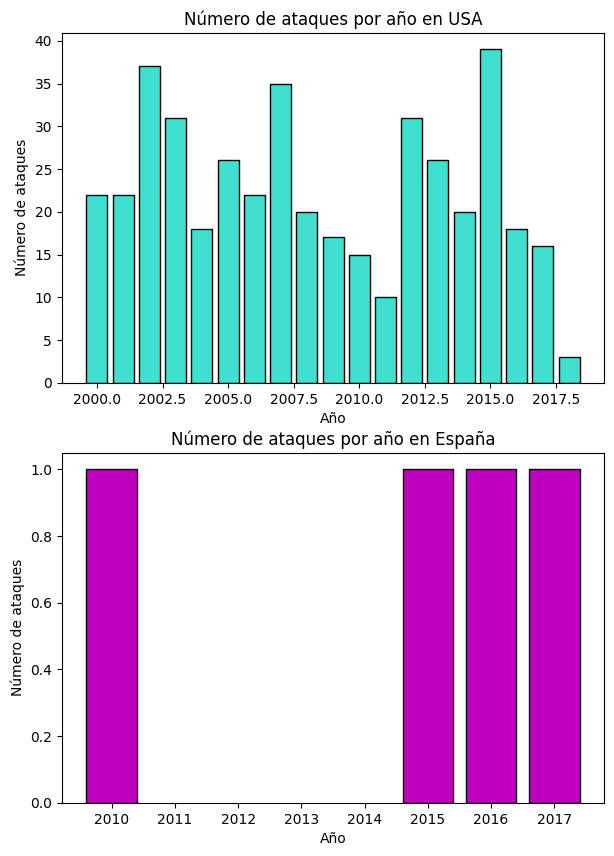

In [14]:
fig,ax=plt.subplots(2,1, figsize=(7,10)) #Indicamos el tamaño del subplot y cambiamos la forma para mayor visualizacion

ax[0].bar(ataques_usa_2000["year"], ataques_usa_2000["case_number"], facecolor  = 'turquoise', edgecolor = "black" ) #Cambiamos los colores de las barras
ax[1].bar(ataques_españa_2000["year"], ataques_españa_2000["case_number"], facecolor  = 'm', edgecolor = "black" )

#Añadimos titulos
ax[0].set_title("Número de ataques por año en USA")
ax[1].set_title("Número de ataques por año en España")

#Añadimos los nomber de los ejes
ax[0].set_xlabel("Año")
ax[0].set_ylabel("Número de ataques")

ax[1].set_xlabel("Año")
ax[1].set_ylabel("Número de ataques")

plt.show();

2- Cread un único gráfico donde juntéis las gráficas de los tipos de ataques en una sola. Debéis:
- Poner leyenda a la gráfica
- Cada línea debe ir en un color
- Ponerle nombre a los ejes y a la gráfica.
- Poner marcadores a las lineas.


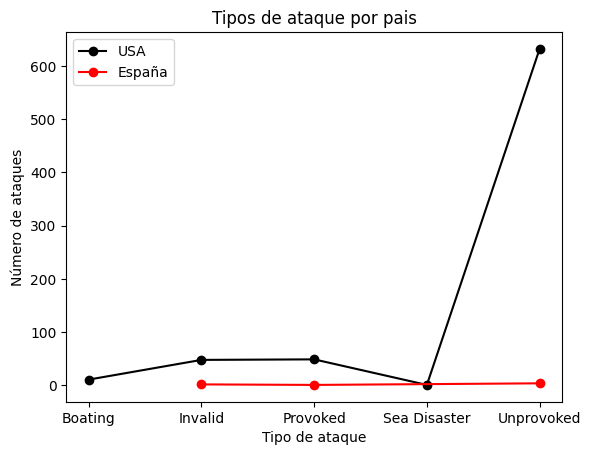

In [20]:
plt.figure()

#Creamos las dos lineas del grafico
plt.plot(ataques_usa_tipo['type'], ataques_usa_tipo['case_number'], marker = 'o', color='black', label = 'USA') 
plt.plot(ataques_españa_tipo['type'], ataques_españa_tipo['case_number'], marker = 'o', color='red', label = 'España') #Cambiamos el color de la linea y añadimos la leyenda

plt.legend() #Añadimos la leyenda

#Añadimos nombres en los ejes
plt.xlabel("Tipo de ataque")
plt.ylabel("Número de ataques")

#Añadimos el titulo
plt.title('Tipos de ataque por pais')

plt.savefig("tipo_ataque_pais.png") #Guardamos la imagen
plt.show()

Guardad las figuras creadas en cada caso. Podéis usar el formato que queráis. Guarda todas las fotos en una carpeta llamada Visualizacion-II.